<a href="https://colab.research.google.com/github/RaulGLZ04/Actividades-/blob/main/af6_arboldedecision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 6: Aprendizaje supervisado, árbol de decisión**
**Integrantes:**


*   2132219 Jorge David Tobias Olloqui IMC
*   2132092 David Alejandro Herrera Herrera IMC
*   2109374 Gabriel Emiliano Cuétero Meza IMC
*   2131987 Luis Raúl González Aguirre IMC
*   2012057 Angel Gabriel Jasso Barcena IMC



# **Objetivo**

Entrenar un árbol de decisión, un modelo de aprendizaje supervisado.


# **Instrucciones**

El estudiante entrenará un modelo de árbol de decisión en Google Colab utilizando el lenguaje de programación Python. Este modelo usará el conjunto de datos "Breast Cancer Wisconsin (Diagnostic)", que contiene características calculadas a partir de imágenes digitalizadas de tumores de cáncer de mama y su correspondiente diagnóstico (maligno o benigno). El conjunto de datos forma parte de la biblioteca scikit-learn.
Durante el preprocesamiento de los datos, se utilizará la función "train_test_split" de la biblioteca scikit-learn para generar los conjuntos de datos de entrenamiento (train_data, train_labels) y de prueba (test_data, test_label). Se utilizará una proporción del 80% para entrenamiento y 20% para prueba.

El modelo de árbol de decisión se entrenará con los datos de entrenamiento utilizando la función "fit" de la biblioteca scikit-learn.

 Se realizarán 3 predicciones con el conjunto de datos de prueba (test_data).

Obtener matriz de confusión de los resultados de la prueba.

Se usará la función "accuracy" de scikit-learn para calcular la precisión, que será la métrica utilizada para evaluar el rendimiento del modelo durante la prueba, así como la función "classification_report", que resume los resultados del rendimiento del modelo en la prueba. Estos resultados deberán mostrarse.

Se visualizará la representación gráfica del árbol de decisión con una resolución de DPI = 300.

1. Se importan las librerías que ayudan a que el modelo de arbol de decisión pueda leer la información y ser entrenado en base a eso, con sus respectivos porcentajes para test y train. También se importa la matriz de confusión para representar la información, así como librerías extra para ayudar a la representacion de la información en gráficas. Por ultimo se importa el archivo csv que se usara en esta actividad.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
import pandas as pd
# Cargar datos desde un archivo CSV
data = pd.read_csv('/content/data.csv')


Cargar datos

In [ ]:
 X = data.drop('diagnosis', axis=1)  # Características (todas las columnas excepto la objetivo)
 y = data['diagnosis']  # Variable objetivo

In [ ]:
len(y)

569

In [ ]:
y[0]

'M'

In [ ]:
diagnosis_mapping = {'M': 1, 'B': 0}
y = y.map(diagnosis_mapping)

In [ ]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

Preprocesamiento

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Selección y entrenamiento del modelo

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Exactitud del modelo en el entrenamiento.
train_accuracy = clf.score(X_train, y_train)
print(train_accuracy)

1.0


Prueba del modelo.

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

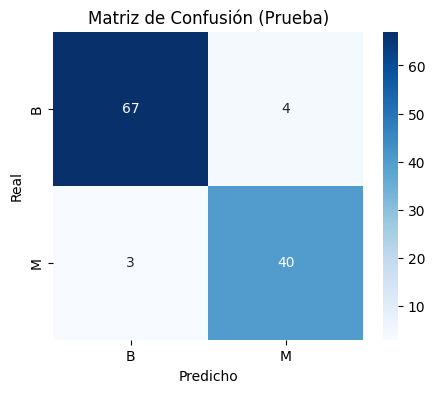

In [ ]:
# Mostrar la matriz de confusión de resultados de la prueba
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión (Prueba)")
plt.show()

In [ ]:
#Predicción 1
print(y_pred[1])
print(y_test.iloc[1]) # Access using iloc for position-based indexing

1
1


In [ ]:
#Predicción 2
print(y_pred[20])
print(y_test.iloc[20])

0
1


In [ ]:
#Predicción 3
print(y_pred[-1])
print(y_test.iloc[-1])

1
1


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")
target_names = ['B', 'M']  # Benigno y Maligno
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

Precisión del modelo: 0.9385964912280702
Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.94      0.95        71
           M       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



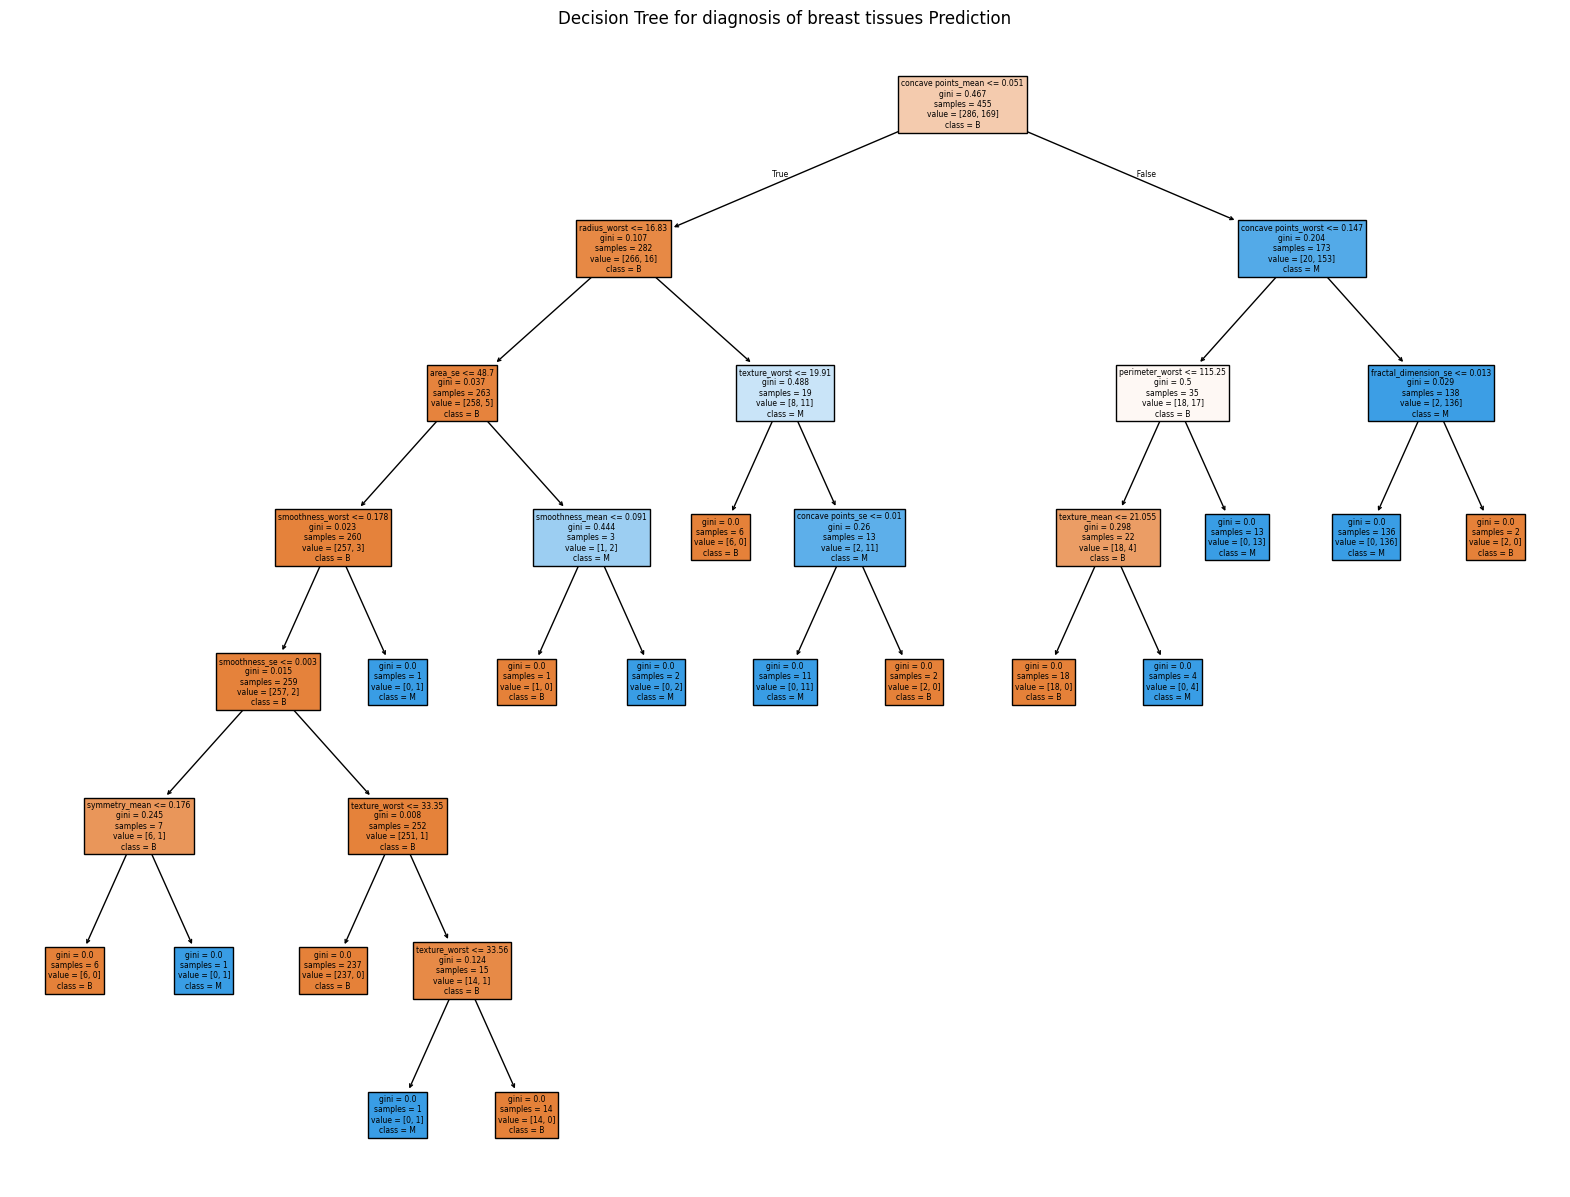

In [ ]:
# Obtener los nombres de las características (columnas de X)
feature_names = X.columns

plt.figure(figsize=(20, 15))  # Increase figure size for better resolution
tree.plot_tree(clf, filled=True, feature_names=feature_names, class_names=target_names)
plt.title("Decision Tree for diagnosis of breast tissues Prediction")
plt.savefig("decision_tree.png", dpi=300)  # Increase DPI for better resolution
plt.show()